In [55]:
import pandas as pd
import spacy
# nlp = spacy.load("nl_core_news_sm")
from tqdm.notebook import tqdm
from wordfreq import word_frequency, top_n_list

In [19]:
df = pd.read_csv('../output/corpus.csv')

In [175]:
def process_text(text, remove_stopwords=True):
    return [token.lemma_ for token in nlp(text) if not ((remove_stopwords and token.is_stop) or token.is_punct or token.is_space)]

nr_of_words = [200, 400, 600, 800, 1000, 1200, 1600]
freqworddict = {str(k): [] for k in nr_of_words}

for number in tqdm(freqworddict.keys(), total=len(freqworddict)):
    freqworddict[number] = process_text(' '.join(top_n_list('nl', int(number))), remove_stopwords=True)
    print(len(freqworddict[number]))

conferenceworddict = {k: {} for k in df.columns}
for column in tqdm(df.columns, total=len(df.columns)):
    conference_words = df.loc[:, column]
    conferenceworddict[column]['totalwords'] = conference_words.sum()
    for number in freqworddict:    
        conferenceworddict[column][f'basicwords{number}'] = 0 

        for word, count in conference_words.iteritems():
            if word in freqworddict[number]:
                conferenceworddict[column][f'basicwords{number}'] += count

  0%|          | 0/7 [00:00<?, ?it/s]

72
217
393
583
776
971
1357


  0%|          | 0/29 [00:00<?, ?it/s]

In [176]:
l3 = conferenceworddict['2020-09-01'].keys()
l3 = [x for x in l3 if 'basicwords' in x]

In [177]:
from pprint import pprint
l = [l3]
# Zonder Stopwoorden
for conference in conferenceworddict:
    l2 = []
    for key in l3:
        conferenceworddict[conference][f'percentage_{key[10:]}'] = float(format(round(conferenceworddict[conference][key] / conferenceworddict[conference]['totalwords'], 2), '.2f'))
        l2.append(conferenceworddict[conference][f'percentage_{key[10:]}'])
    l.append(l2)
#pprint(conferenceworddict)
pprint(l)

[['basicwords200',
  'basicwords400',
  'basicwords600',
  'basicwords800',
  'basicwords1000',
  'basicwords1200',
  'basicwords1600'],
 [0.19, 0.36, 0.42, 0.48, 0.53, 0.56, 0.62],
 [0.22, 0.37, 0.44, 0.51, 0.55, 0.58, 0.64],
 [0.23, 0.37, 0.43, 0.48, 0.54, 0.57, 0.64],
 [0.22, 0.37, 0.43, 0.48, 0.52, 0.55, 0.61],
 [0.2, 0.35, 0.41, 0.46, 0.51, 0.55, 0.62],
 [0.26, 0.43, 0.49, 0.54, 0.58, 0.61, 0.66],
 [0.22, 0.37, 0.45, 0.51, 0.55, 0.58, 0.63],
 [0.23, 0.37, 0.44, 0.5, 0.54, 0.57, 0.62],
 [0.21, 0.35, 0.42, 0.48, 0.52, 0.56, 0.61],
 [0.21, 0.36, 0.42, 0.48, 0.52, 0.55, 0.61],
 [0.21, 0.36, 0.42, 0.48, 0.52, 0.56, 0.63],
 [0.21, 0.35, 0.42, 0.48, 0.53, 0.56, 0.63],
 [0.22, 0.38, 0.44, 0.5, 0.54, 0.57, 0.63],
 [0.21, 0.37, 0.44, 0.5, 0.53, 0.56, 0.61],
 [0.2, 0.36, 0.42, 0.49, 0.53, 0.56, 0.62],
 [0.2, 0.34, 0.41, 0.49, 0.53, 0.56, 0.61],
 [0.24, 0.38, 0.45, 0.52, 0.55, 0.58, 0.64],
 [0.21, 0.37, 0.43, 0.51, 0.55, 0.58, 0.63],
 [0.22, 0.35, 0.43, 0.5, 0.54, 0.57, 0.62],
 [0.22, 0.36, 0

Text(0, 0.5, 'percentage of basic words')

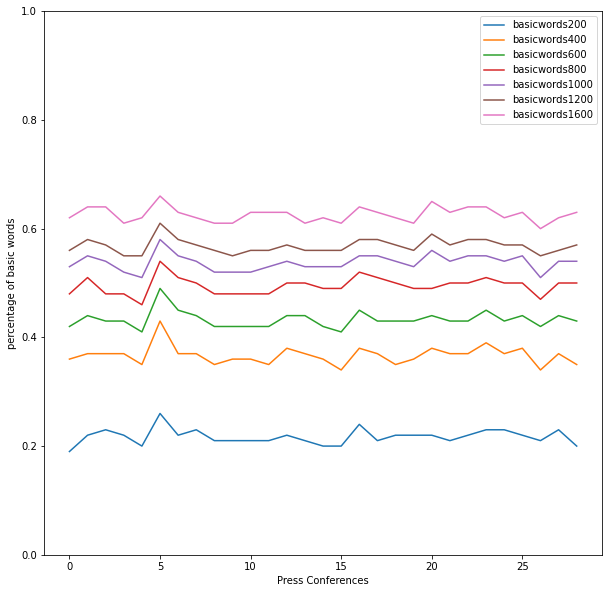

In [189]:
df2 = pd.DataFrame(data=l[1:], columns=l[0])
#lines = df2.plot.line()
a = df2.plot.line(figsize=(10,10))
a.set_ylim(0, 1)
a.set_xlabel('Press Conferences')
a.set_ylabel('percentage of basic words')
